# Taller 1: operaciones elementales sobre imágenes

## Genere  una imagen de 256x256x1 con valores entre 255 y 0. Genere una imagen rampa que vaya de negro a blanco de izquierda a derecha. Visualice el resultado.

Para crear la imagen rampa, creamos un vector con valores de 0 a 255 y lo replicamos verticalmente 256 veces.

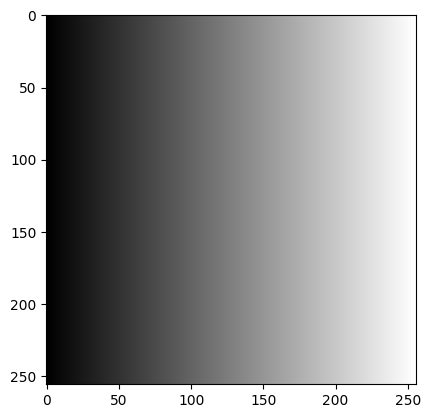

In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

vector_asc = np.array(range(0,256), dtype=np.uint8)
imagen_rampa = np.tile(vector_asc, (256, 1))

plt.imshow(imagen_rampa, cmap='gray')
plt.show()


## Cargue y visualice las imágenes de trabajo.

In [2]:
# Modificar las rutas de las imagenes.
PATH_IMAGES = "./imagenes/"

In [3]:
imagen_AQUITAIN = cv2.imread(PATH_IMAGES + "AQUITAIN.png", cv2.IMREAD_GRAYSCALE)
imagen_SCANNER = cv2.imread(PATH_IMAGES + "SCANNER.png", cv2.IMREAD_GRAYSCALE)

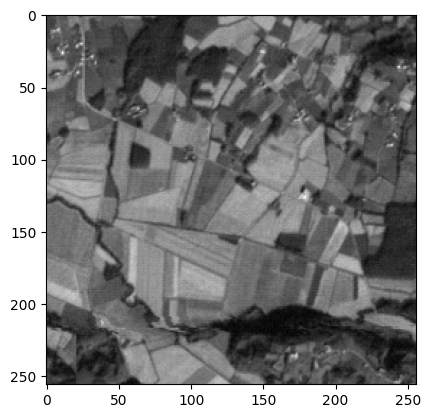

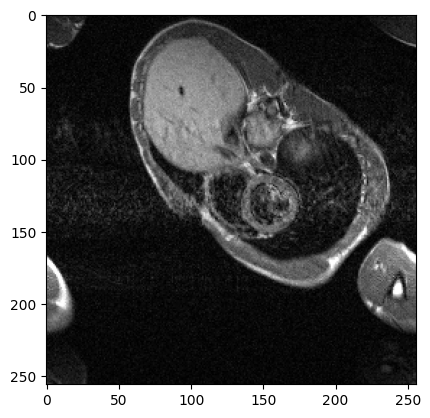

In [4]:
plt.imshow(imagen_AQUITAIN, cmap='grey')
plt.show()
plt.imshow(imagen_SCANNER, cmap='grey')
plt.show()


## Aplique una paleta de colores a cada una de estas 3 imágenes.  Visualice las imágenes resultado y las curvas. Utilice la imagen rampa para entender la distribución de los colores. Comente sus observaciones.

Empezamos creando una imagen rampa inversa, que es el equivalente a ver el negativo de la imagen rampa. 

In [5]:
imagen_rampa_inv = 255 - imagen_rampa

También creamos una look up table para color rojo y una para verde

In [19]:
lut_red = np.zeros((256, 1, 3), dtype=np.uint8)
for i in range(256):
    lut_red[i, 0, 0] = 0      # B
    lut_red[i, 0, 1] = 0      # G 
    lut_red[i, 0, 2] = i      # R

lut_green = np.zeros((256, 1, 3), dtype=np.uint8)
for i in range(256):
    lut_green[i, 0, 0] = 0    # B
    lut_green[i, 0, 1] = i    # G
    lut_green[i, 0, 2] = 0    # R


Ahora aplicamos `cv2.LUT` para diferentes combinaciones de las imágenes y LUT que tenemos. Para la rampa inversa, usamos directamente `imagen_rampa_inv` que ya tiene el negativo calculado.

In [20]:
# La rampa inversa ya está calculada
imagen_rampa_inversa = imagen_rampa_inv

# Aplicar LUT de color rojo a la rampa
imagen_rampa_bgr = cv2.merge([imagen_rampa, imagen_rampa, imagen_rampa])
imagen_rampa_red = cv2.LUT(imagen_rampa_bgr, lut_red)

imagen_AQUITAIN_bgr = cv2.merge([imagen_AQUITAIN, imagen_AQUITAIN, imagen_AQUITAIN])
imagen_AQUITAIN_green = cv2.LUT(imagen_AQUITAIN_bgr, lut_green)

imagen_SCANNER_bgr = cv2.merge([imagen_SCANNER, imagen_SCANNER, imagen_SCANNER])
imagen_SCANNER_red = cv2.LUT(imagen_SCANNER_bgr, lut_red)


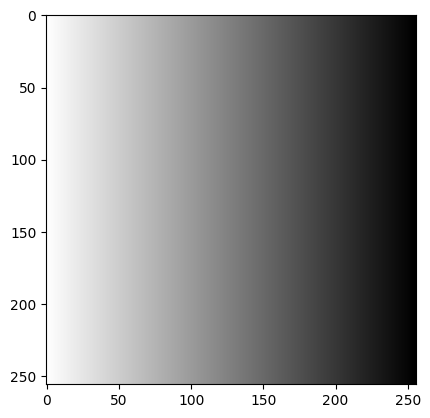

In [21]:
plt.imshow(imagen_rampa_inversa, cmap='gray')
plt.show()

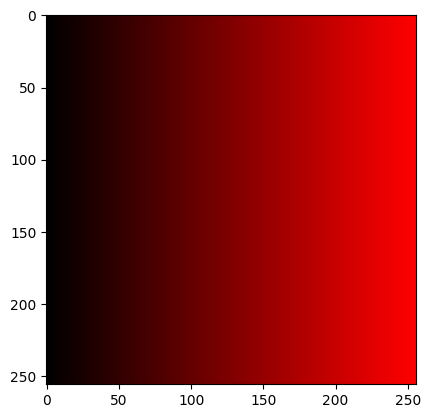

In [24]:
plt.imshow(cv2.cvtColor(imagen_rampa_red, cv2.COLOR_BGR2RGB))

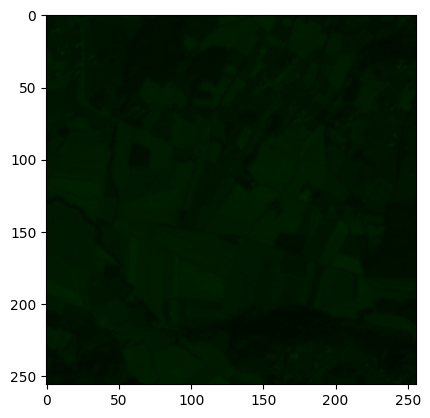

In [25]:
plt.imshow(cv2.cvtColor(imagen_AQUITAIN_green, cv2.COLOR_BGR2RGB))

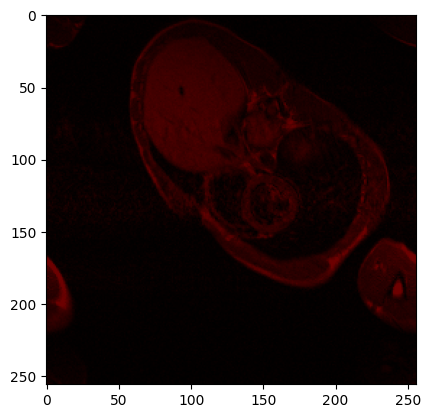

In [26]:
plt.imshow(cv2.cvtColor(imagen_SCANNER_red, cv2.COLOR_BGR2RGB))

Ahora veremos la comparación de histogramas de las imágenes originales en escalas de grises y las imágenes luego de la transformación con LUTs. Hay una limitación en la comparación y es que las gráficas en RGB tienen 3 canales y frecuencias, en comparación a las imágenes en tonos de grises que solo tienen un canal.

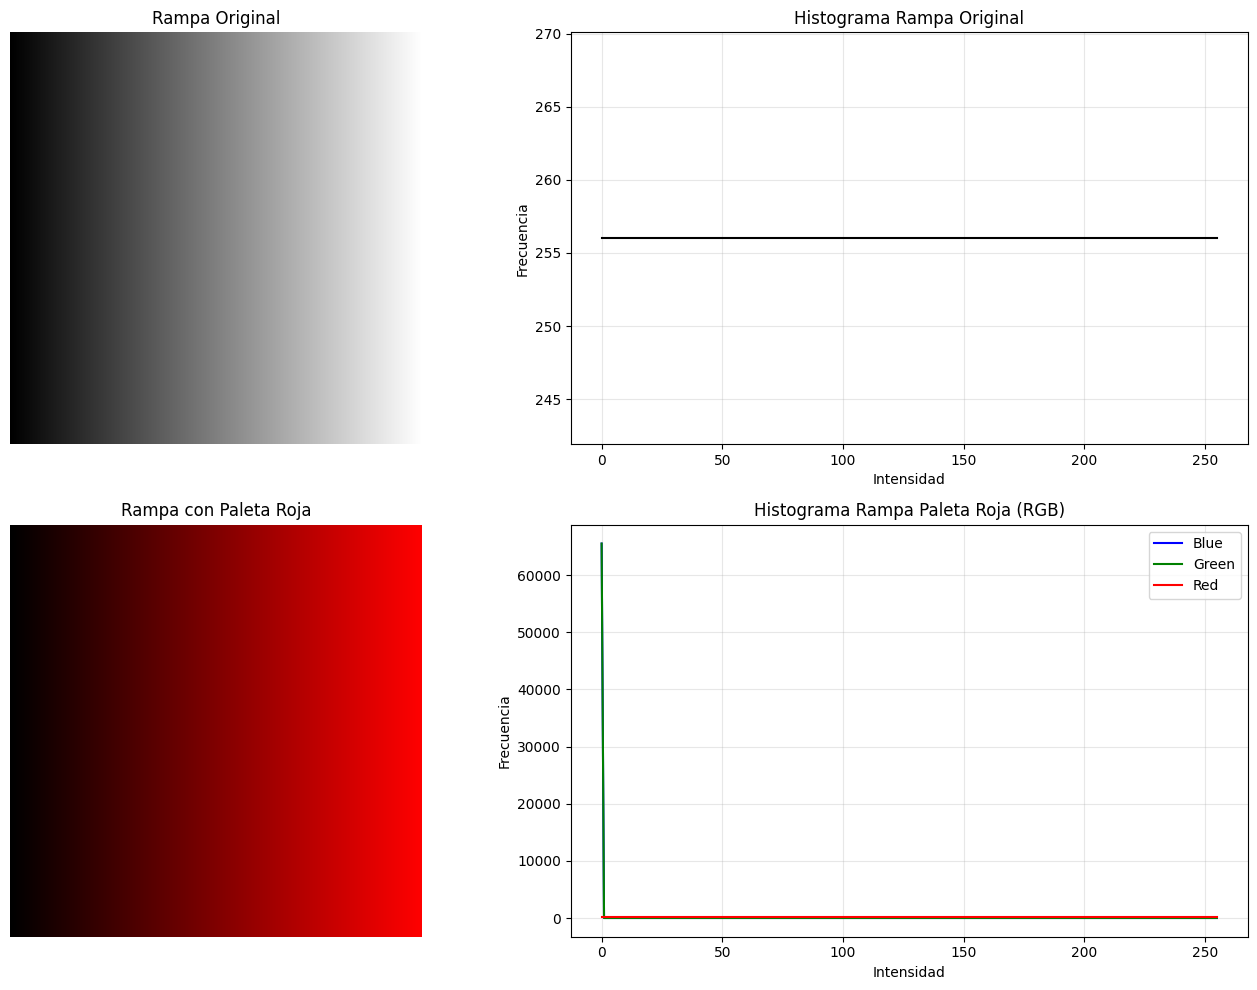

In [30]:
# Visualizar histogramas - Comparar original vs con paleta

# Para imagen rampa
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Rampa original - histograma
axes[0,0].imshow(imagen_rampa, cmap='gray')
axes[0,0].set_title('Rampa Original')
axes[0,0].axis('off')

hist_rampa = cv2.calcHist([imagen_rampa], [0], None, [256], [0,256])
axes[0,1].plot(hist_rampa, 'k')
axes[0,1].set_title('Histograma Rampa Original')
axes[0,1].set_xlabel('Intensidad')
axes[0,1].set_ylabel('Frecuencia')
axes[0,1].grid(True, alpha=0.3)

# Rampa con paleta roja
rampa_bgr = cv2.merge([imagen_rampa, imagen_rampa, imagen_rampa])
rampa_red = cv2.LUT(rampa_bgr, lut_red)
axes[1,0].imshow(cv2.cvtColor(rampa_red, cv2.COLOR_BGR2RGB))
axes[1,0].set_title('Rampa con Paleta Roja')
axes[1,0].axis('off')

# Histogramas RGB de rampa con paleta roja
for i, color in enumerate(['b', 'g', 'r']):
    hist = cv2.calcHist([rampa_red], [i], None, [256], [0,256])
    axes[1,1].plot(hist, color=color, label=['Blue', 'Green', 'Red'][i])
axes[1,1].set_title('Histograma Rampa Paleta Roja (RGB)')
axes[1,1].set_xlabel('Intensidad')
axes[1,1].set_ylabel('Frecuencia')
axes[1,1].legend()
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

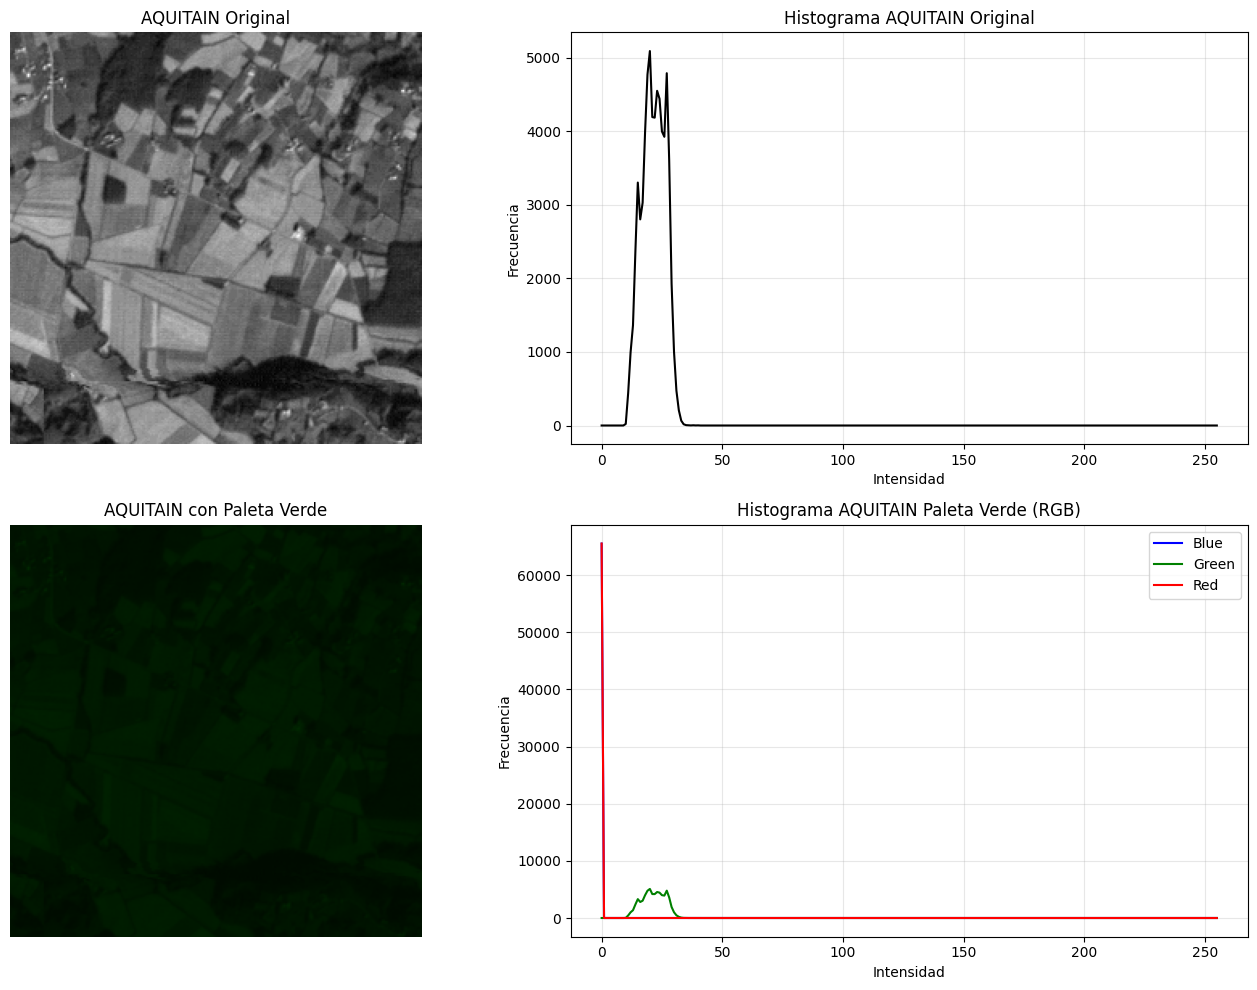

In [31]:
ig, axes = plt.subplots(2, 2, figsize=(14, 10))

axes[0,0].imshow(imagen_AQUITAIN, cmap='gray')
axes[0,0].set_title('AQUITAIN Original')
axes[0,0].axis('off')

hist_aquitain = cv2.calcHist([imagen_AQUITAIN], [0], None, [256], [0,256])
axes[0,1].plot(hist_aquitain, 'k')
axes[0,1].set_title('Histograma AQUITAIN Original')
axes[0,1].set_xlabel('Intensidad')
axes[0,1].set_ylabel('Frecuencia')
axes[0,1].grid(True, alpha=0.3)

axes[1,0].imshow(cv2.cvtColor(imagen_AQUITAIN_green, cv2.COLOR_BGR2RGB))
axes[1,0].set_title('AQUITAIN con Paleta Verde')
axes[1,0].axis('off')

for i, color in enumerate(['b', 'g', 'r']):
    hist = cv2.calcHist([imagen_AQUITAIN_green], [i], None, [256], [0,256])
    axes[1,1].plot(hist, color=color, label=['Blue', 'Green', 'Red'][i])
axes[1,1].set_title('Histograma AQUITAIN Paleta Verde (RGB)')
axes[1,1].set_xlabel('Intensidad')
axes[1,1].set_ylabel('Frecuencia')
axes[1,1].legend()
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

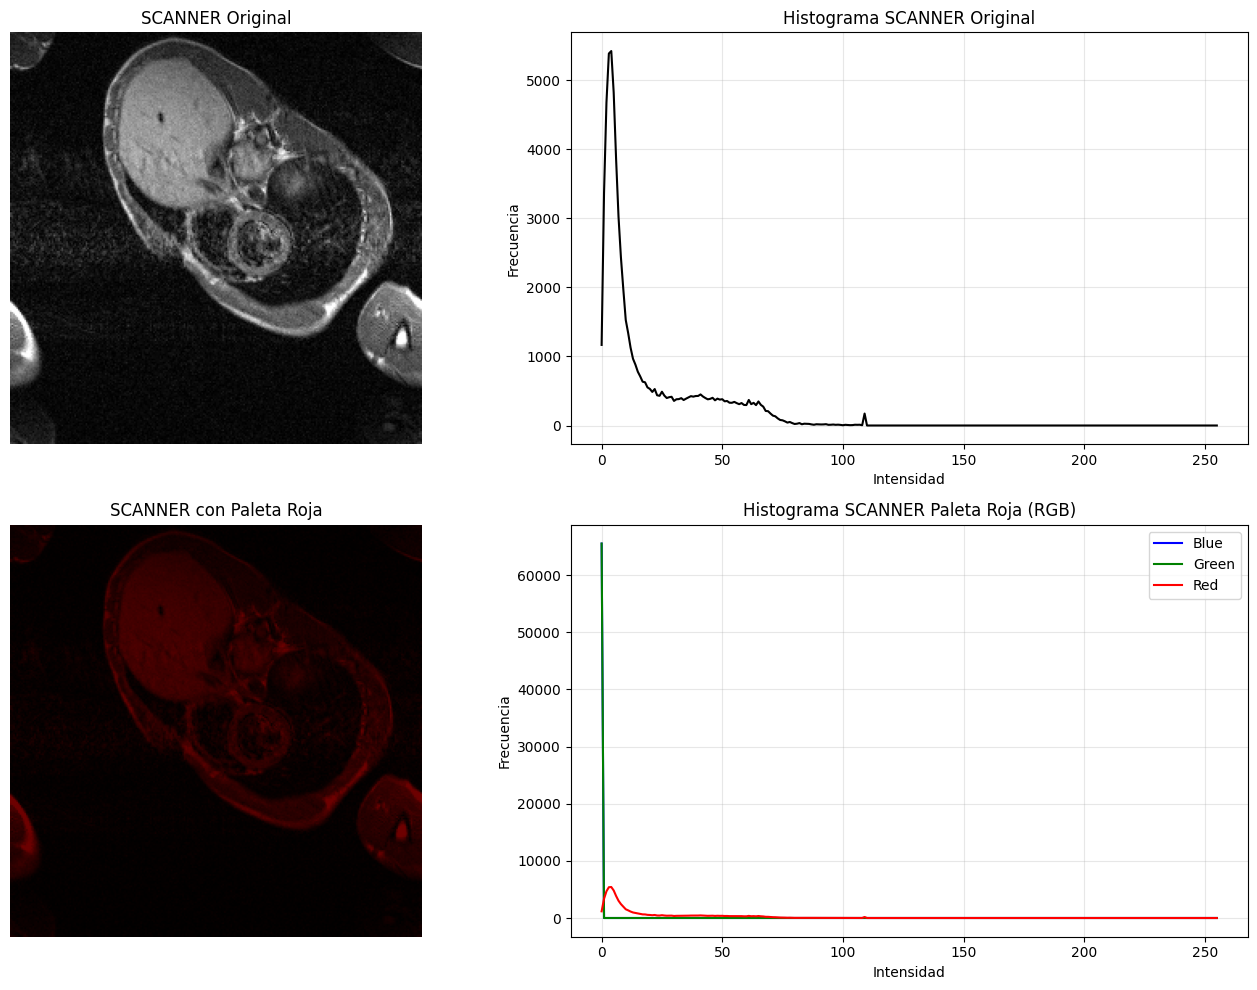

In [35]:
# Para SCANNER con paleta roja
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

axes[0,0].imshow(imagen_SCANNER, cmap='gray')
axes[0,0].set_title('SCANNER Original')
axes[0,0].axis('off')

hist_scanner = cv2.calcHist([imagen_SCANNER], [0], None, [256], [0,256])
axes[0,1].plot(hist_scanner, 'k')
axes[0,1].set_title('Histograma SCANNER Original')
axes[0,1].set_xlabel('Intensidad')
axes[0,1].set_ylabel('Frecuencia')
axes[0,1].grid(True, alpha=0.3)

axes[1,0].imshow(cv2.cvtColor(imagen_SCANNER_red, cv2.COLOR_BGR2RGB))
axes[1,0].set_title('SCANNER con Paleta Roja')
axes[1,0].axis('off')

for i, color in enumerate(['b', 'g', 'r']):
    hist = cv2.calcHist([imagen_SCANNER_red], [i], None, [256], [0,256])
    axes[1,1].plot(hist, color=color, label=['Blue', 'Green', 'Red'][i])
axes[1,1].set_title('Histograma SCANNER Paleta Roja (RGB)')
axes[1,1].set_xlabel('Intensidad')
axes[1,1].set_ylabel('Frecuencia')
axes[1,1].legend()
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

La comparación inicial con los histogramas en 3 canales permite ver los picos en 0 de los canales que no son usados. Por ejemplo, en SCANNER solo tenemos mapeados los valores de rojo, mientras que el verde y el azul quedan en 0, lo cual se refleja como un pico gigante en la intensidad 0 para esos canales.

En general, el cambio de paleta de colores denota el cambio de color como tal, pero la intensidad sigue siendo la misma, dado que es un mapeo lineal. La distribución de frecuencias se preserva completamente. En la siguiente celda hay una comparación adicional de histogramas, donde se ven solo los canales que fueron intervenidos. Acá podemos ver que se demuestra la afirmación del mape lineal. Se nota exactamente la misma curva en el histograma original y en el canal de color aplicado. Lo que cambia es únicamente el canal y el color visual (de gris a rojo o verde), pero la información estadística de intensidades permanece idéntica.

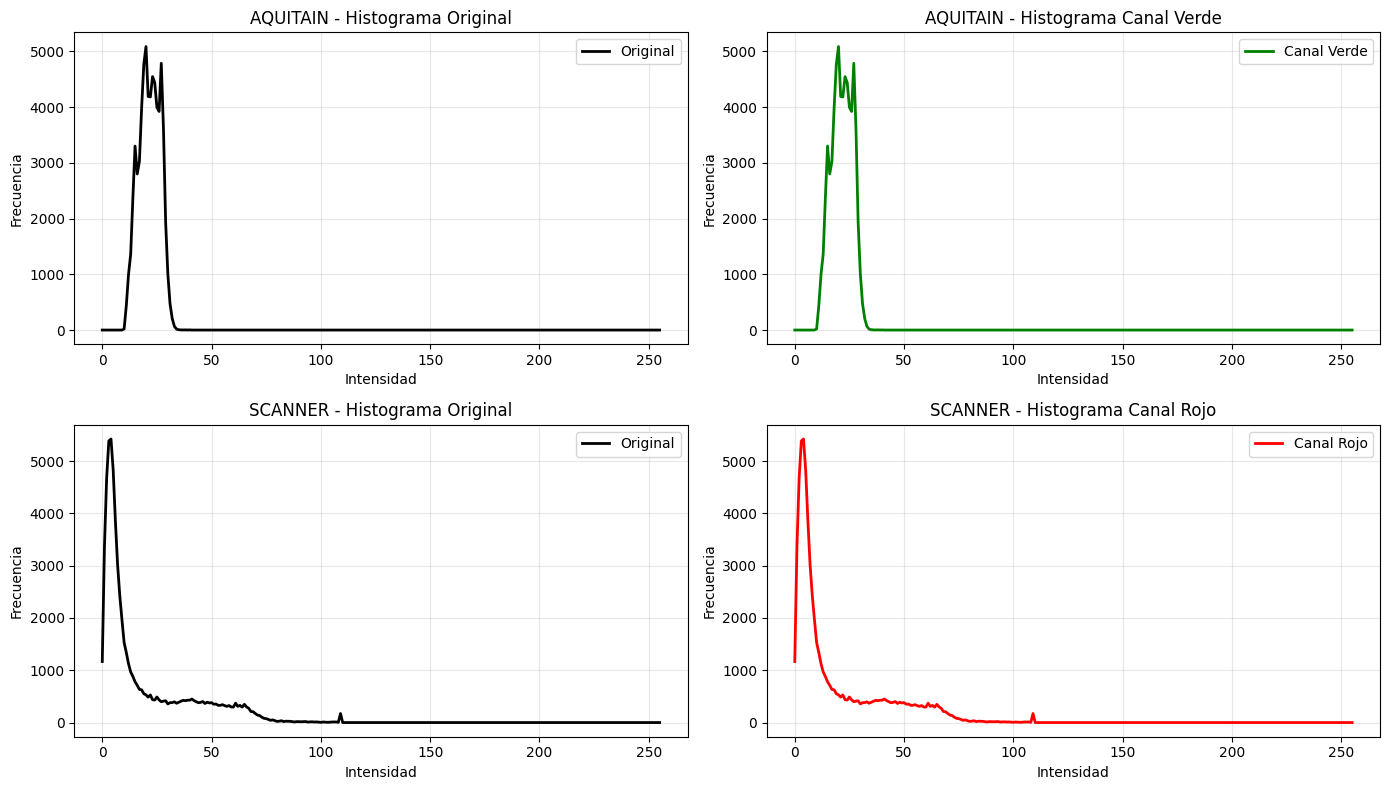

In [36]:
fig, axes = plt.subplots(2, 2, figsize=(14, 8))


hist_aquitain_original = cv2.calcHist([imagen_AQUITAIN], [0], None, [256], [0,256])
hist_aquitain_verde = cv2.calcHist([imagen_AQUITAIN_green], [1], None, [256], [0,256])  # Canal 1 = Green

axes[0,0].plot(hist_aquitain_original, 'k', label='Original', linewidth=2)
axes[0,0].set_title('AQUITAIN - Histograma Original')
axes[0,0].set_xlabel('Intensidad')
axes[0,0].set_ylabel('Frecuencia')
axes[0,0].grid(True, alpha=0.3)
axes[0,0].legend()

axes[0,1].plot(hist_aquitain_verde, 'g', label='Canal Verde', linewidth=2)
axes[0,1].set_title('AQUITAIN - Histograma Canal Verde')
axes[0,1].set_xlabel('Intensidad')
axes[0,1].set_ylabel('Frecuencia')
axes[0,1].grid(True, alpha=0.3)
axes[0,1].legend()

hist_scanner_original = cv2.calcHist([imagen_SCANNER], [0], None, [256], [0,256])
hist_scanner_rojo = cv2.calcHist([imagen_SCANNER_red], [2], None, [256], [0,256])  # Canal 2 = Red

axes[1,0].plot(hist_scanner_original, 'k', label='Original', linewidth=2)
axes[1,0].set_title('SCANNER - Histograma Original')
axes[1,0].set_xlabel('Intensidad')
axes[1,0].set_ylabel('Frecuencia')
axes[1,0].grid(True, alpha=0.3)
axes[1,0].legend()

axes[1,1].plot(hist_scanner_rojo, 'r', label='Canal Rojo', linewidth=2)
axes[1,1].set_title('SCANNER - Histograma Canal Rojo')
axes[1,1].set_xlabel('Intensidad')
axes[1,1].set_ylabel('Frecuencia')
axes[1,1].grid(True, alpha=0.3)
axes[1,1].legend()

plt.tight_layout()
plt.show()

## En la imagen scanner.png realice una expansión lineal del contraste, visualice la imagen expandida y su histograma. Aplique a la imagen expandida la misma paleta de colores que utilizó en el punto 4. Visualice la imagen resultado y su histograma.

Empezamos con la expansión lineal del contraste, escalando los valores de la intensidad para que queden de 0 a 255.

In [38]:
min_val = imagen_SCANNER.min()
max_val = imagen_SCANNER.max()
imagen_SCANNER_expandida = ((imagen_SCANNER - min_val) * (255 / (max_val - min_val))).astype('uint8')

Ahora visualizamos el cambio en la imagen y el histograma en escala de grises. Se ve un mayor contraste entre los tonos de la imagen y el histograma muestra el cambio de rango de los valores de intesidad. También muestra unos saltos entre los picos de los valores de la intesidad.

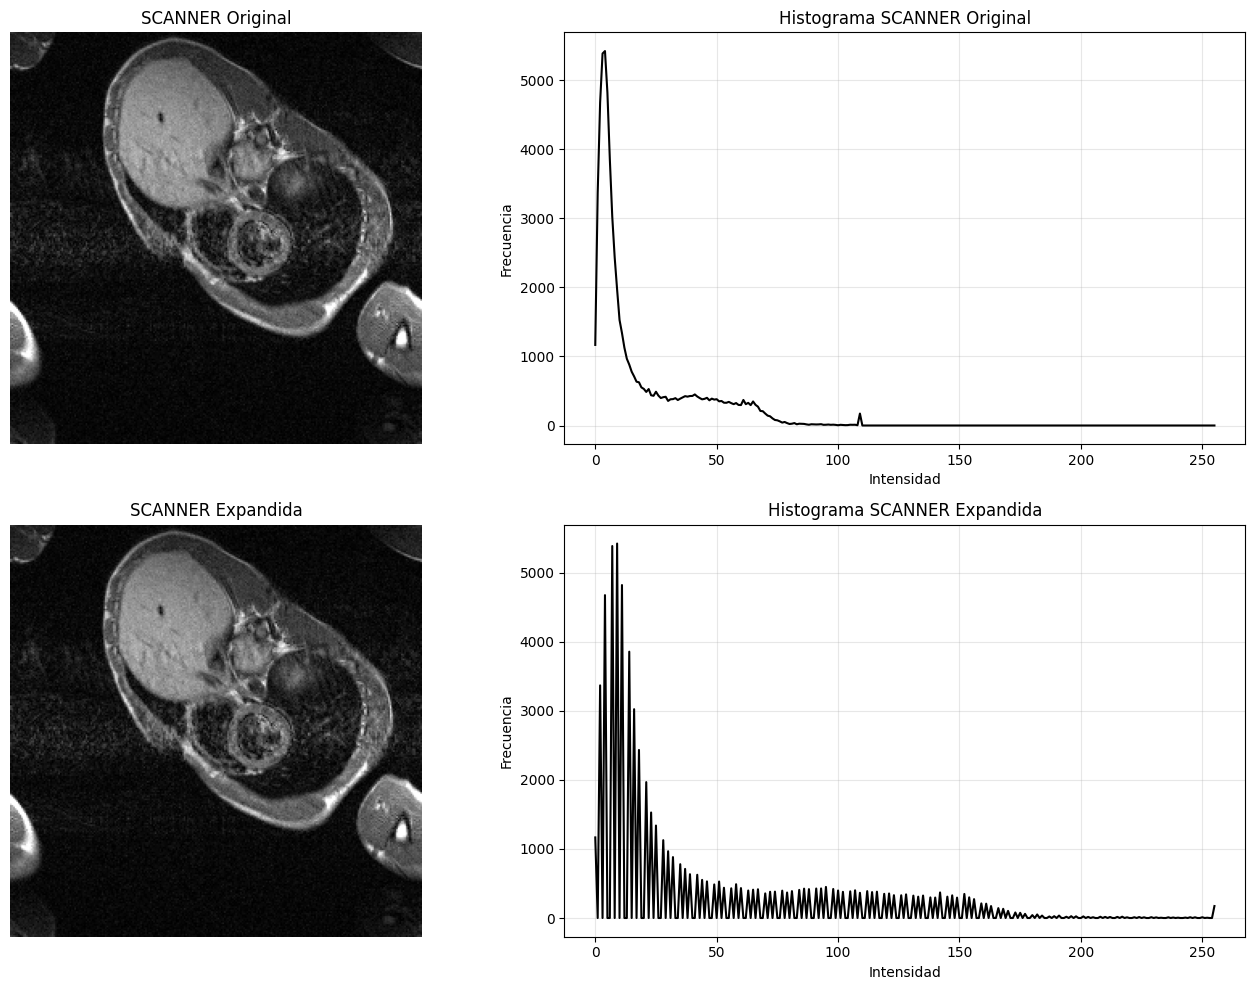

In [40]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Original
axes[0,0].imshow(imagen_SCANNER, cmap='gray')
axes[0,0].set_title('SCANNER Original')
axes[0,0].axis('off')

hist_scanner_orig = cv2.calcHist([imagen_SCANNER], [0], None, [256], [0,256])
axes[0,1].plot(hist_scanner_orig, 'k')
axes[0,1].set_title('Histograma SCANNER Original')
axes[0,1].set_xlabel('Intensidad')
axes[0,1].set_ylabel('Frecuencia')
axes[0,1].grid(True, alpha=0.3)

axes[1,0].imshow(imagen_SCANNER_expandida, cmap='gray')
axes[1,0].set_title('SCANNER Expandida')
axes[1,0].axis('off')

hist_scanner_exp = cv2.calcHist([imagen_SCANNER_expandida], [0], None, [256], [0,256])
axes[1,1].plot(hist_scanner_exp, 'k')
axes[1,1].set_title('Histograma SCANNER Expandida')
axes[1,1].set_xlabel('Intensidad')
axes[1,1].set_ylabel('Frecuencia')
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Aplicamos LUT a la imagen expandida.

In [41]:
imagen_SCANNER_expandida_bgr = cv2.merge([imagen_SCANNER_expandida, imagen_SCANNER_expandida, imagen_SCANNER_expandida])
imagen_SCANNER_expandida_red = cv2.LUT(imagen_SCANNER_expandida_bgr, lut_red)


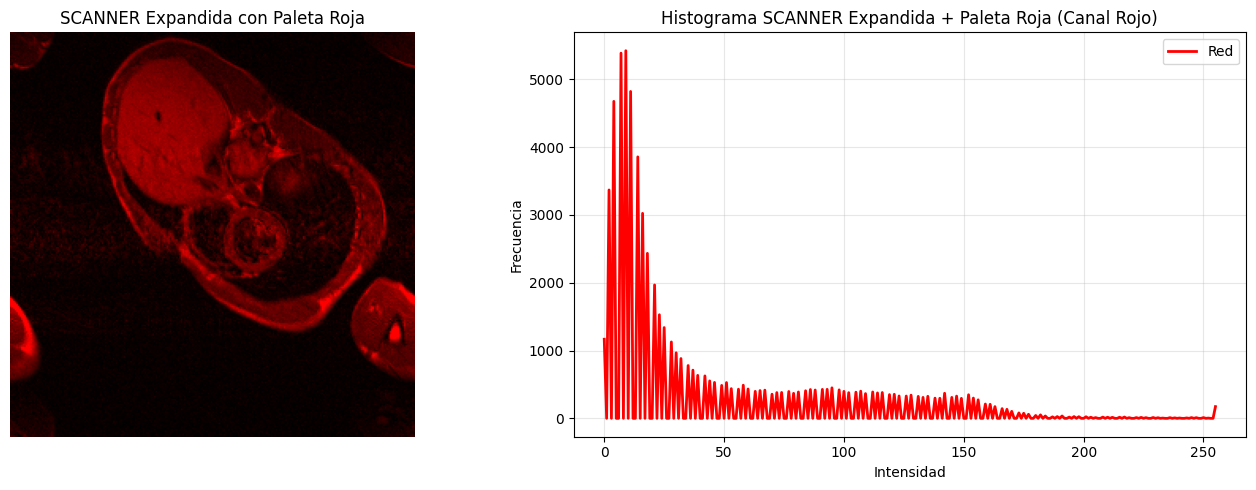

In [43]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].imshow(cv2.cvtColor(imagen_SCANNER_expandida_red, cv2.COLOR_BGR2RGB))
axes[0].set_title('SCANNER Expandida con Paleta Roja')
axes[0].axis('off')

hist_rojo = cv2.calcHist([imagen_SCANNER_expandida_red], [2], None, [256], [0,256])  # Canal 2 = Red
axes[1].plot(hist_rojo, 'r', label='Red', linewidth=2)
axes[1].set_title('Histograma SCANNER Expandida + Paleta Roja (Canal Rojo)')
axes[1].set_xlabel('Intensidad')
axes[1].set_ylabel('Frecuencia')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

La conclusiónn es igual a la de tono de grises. Hay un mayor contraste entre los tonos de rojo y la imagen tiene mejor calidad, permitiendo distinguir las regiones y bordes de la misma. El histograma es igual al de tonos de grises luego de la expansión. 